In [1]:
from plot_resistograph_data import read_nodes, read_resistograph_data, add_resistograph_data, add_scale
import matplotlib.pyplot as plt

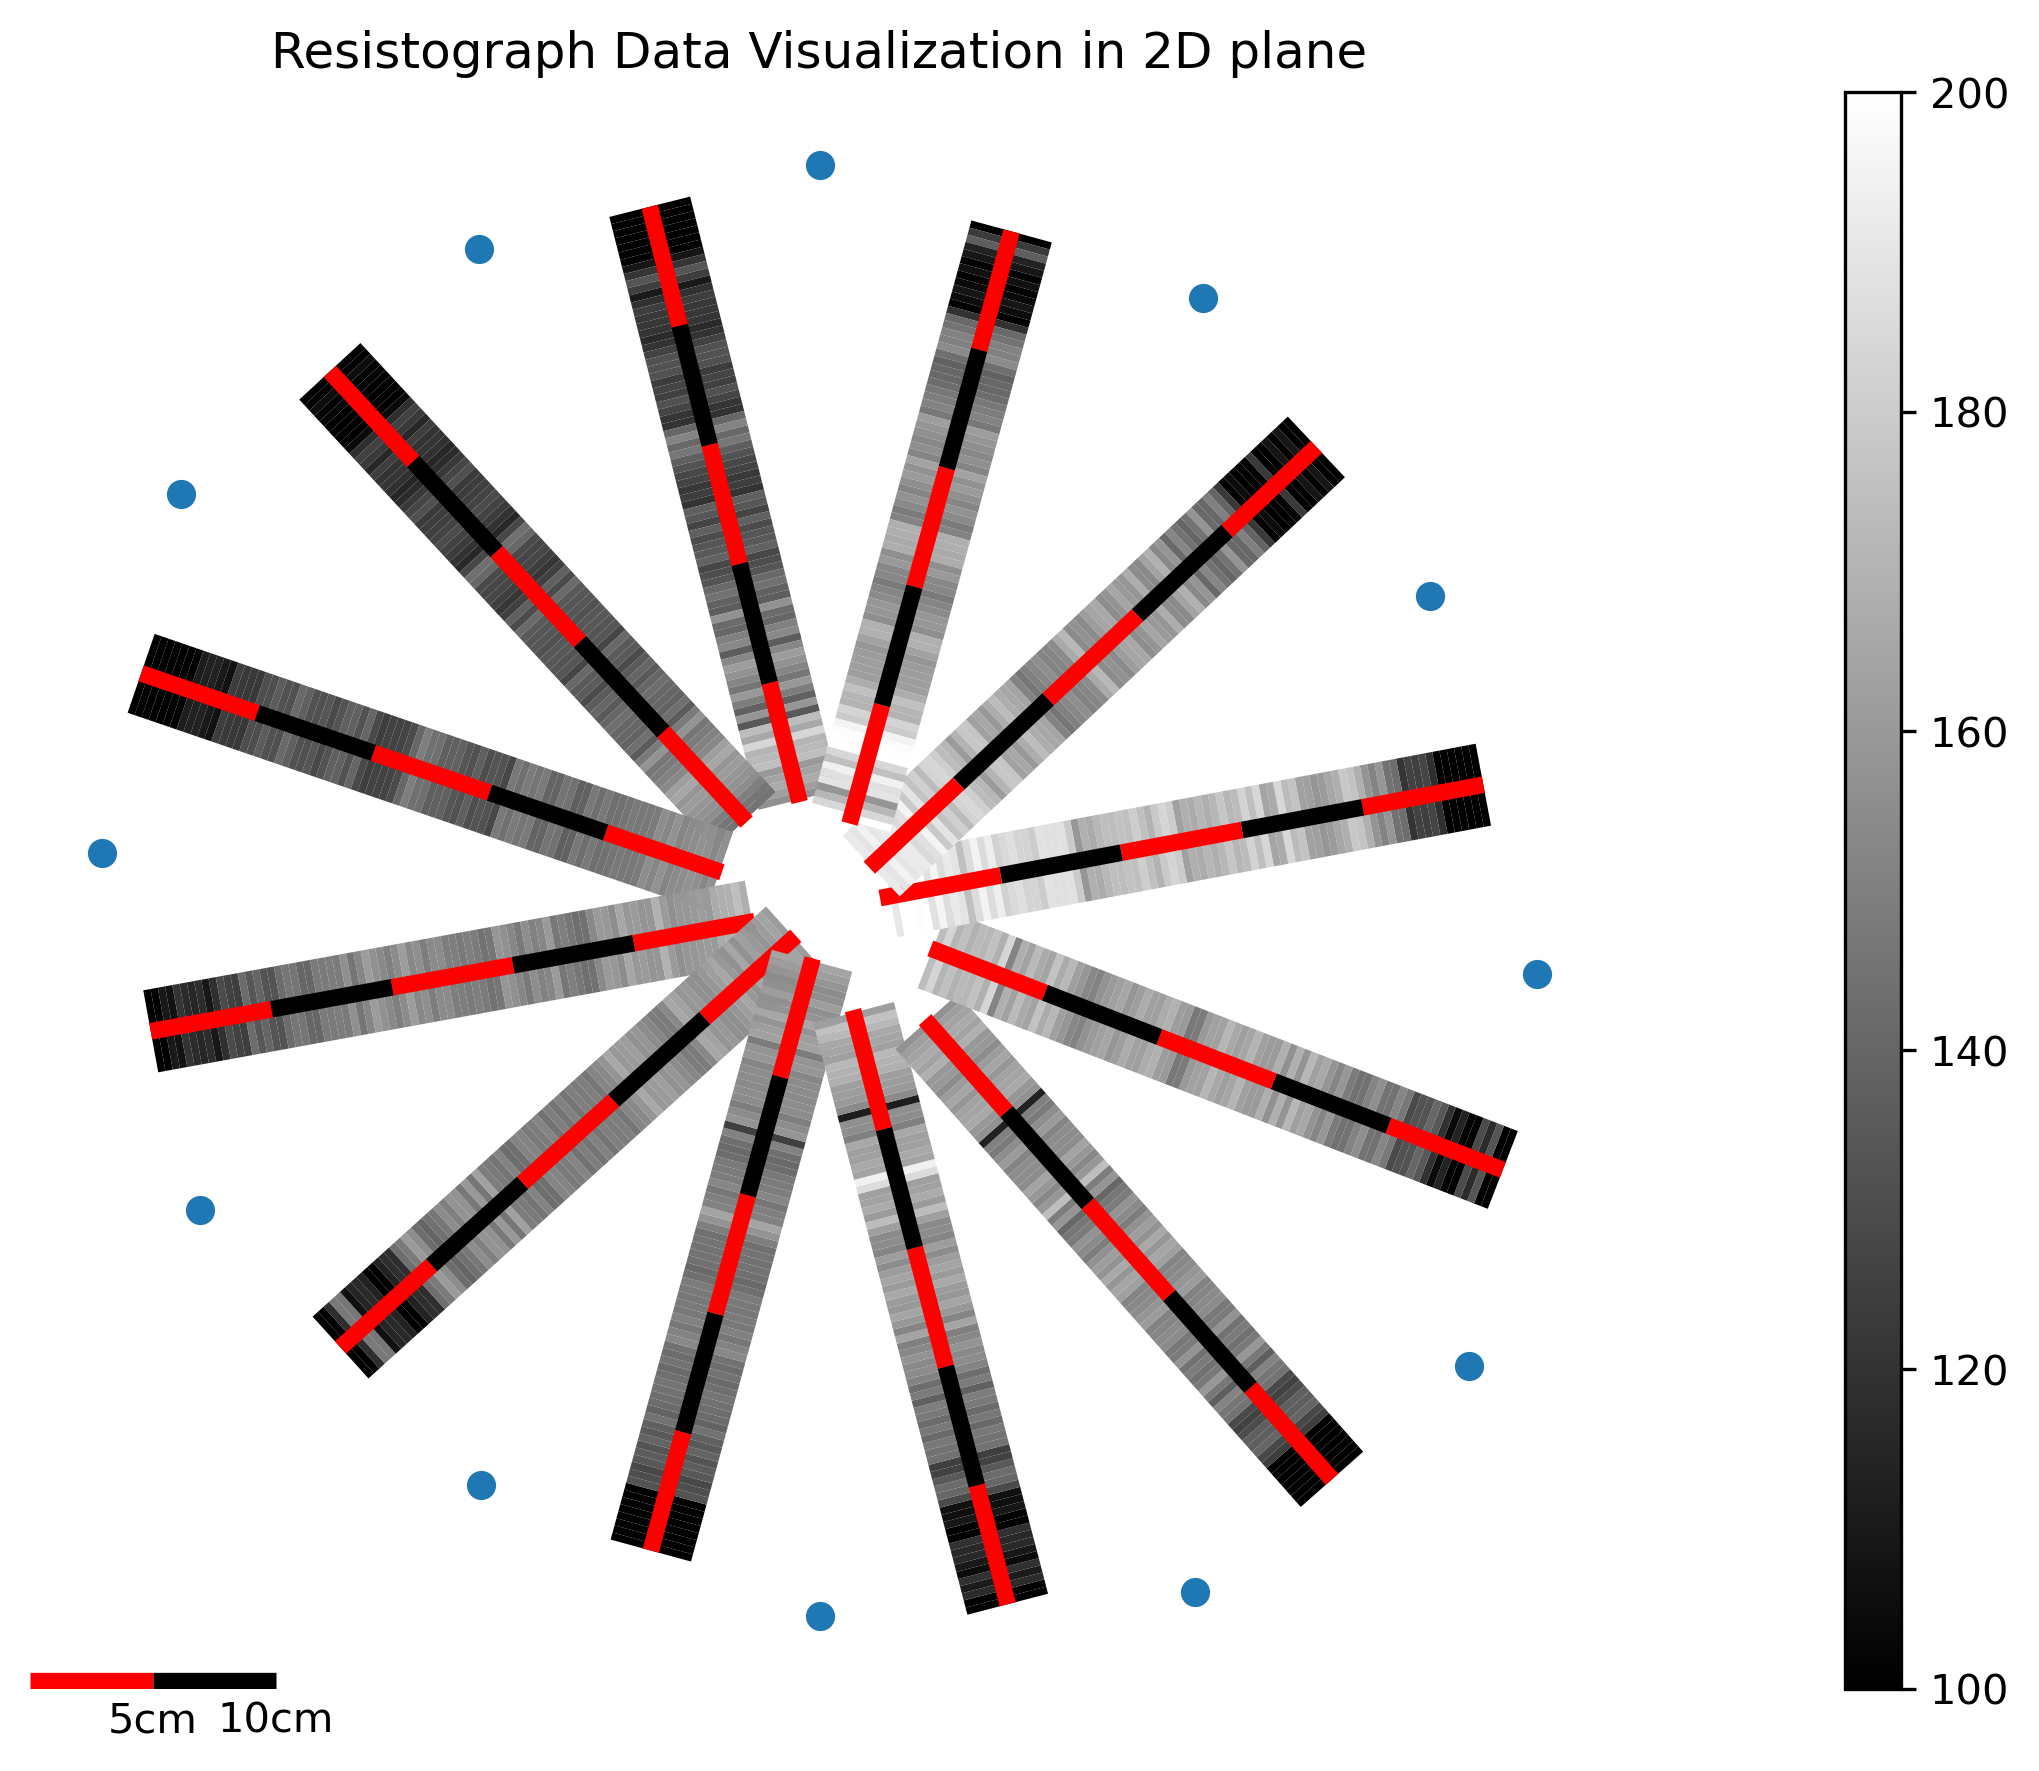

In [2]:
# Setup parameters
data_dir = "data/"
settings_filter = {
    'window_length': 201,
    'polyorder': 3,
    'upper_limit': 250
}
settings_plot = {
    'min': 100,
    'max': 200,
    'step': 300,
    'linewidth': 20,
    'cmap': 'gray'
}
scale_length = 250

# Read data
# Note: Adjust the data_dir and settings as needed for your specific use case
resistograph_df = read_resistograph_data(data_dir, **settings_filter)
nodes_df = read_nodes(data_dir)

# Plotting nodes, resistograph data, and scale
# set higher DPI for better resolution
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
fig, [ax, cax] = plt.subplots(1, 2, figsize=(8, 6), gridspec_kw={'width_ratios': [40, 1]})
ax.plot(nodes_df['x'], nodes_df['y'], 'o')
add_resistograph_data(resistograph_df, nodes_df, ax, cax, scale_length=scale_length, **settings_plot)
add_scale(ax)

# Final adjustments
ax.set_title('Resistograph Data Visualization in 2D plane')
ax.set_aspect(1)
plt.tight_layout()
fig.savefig("fig1.png")
plt.show()



<Axes: title={'center': 'Resistograph Data Visualization'}, xlabel='depth/mm'>

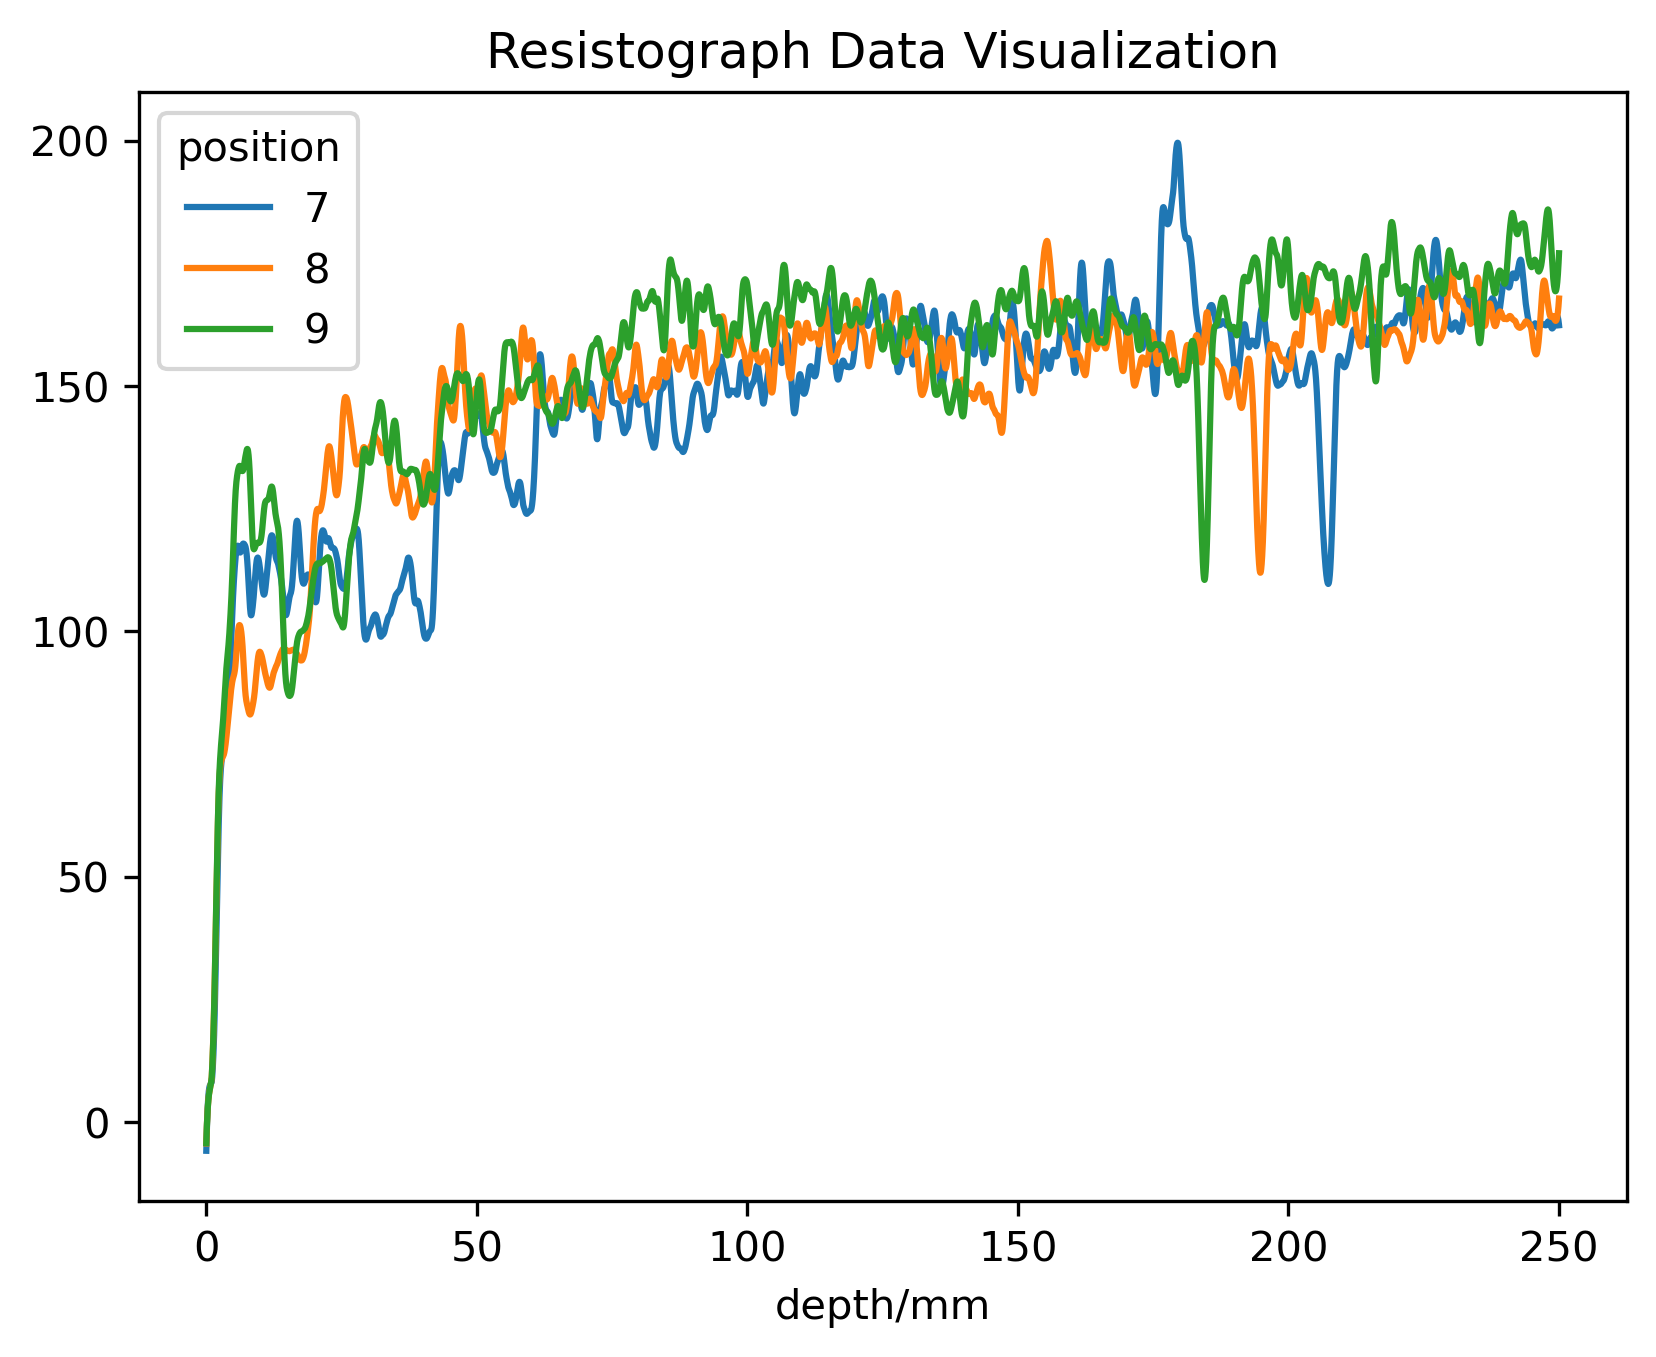

In [3]:
plotly_settings = {'backend': 'plotly', 
    'labels': {'value': 'Resistograph Value'},
    'width': 800, 'height': 600}
# plot selected columns
# uncomment the plotly_settings dictionary to get interactive plot
resistograph_df[[7,8,9]].plot(
    title='Resistograph Data Visualization', 
    #**plotly_settings
)


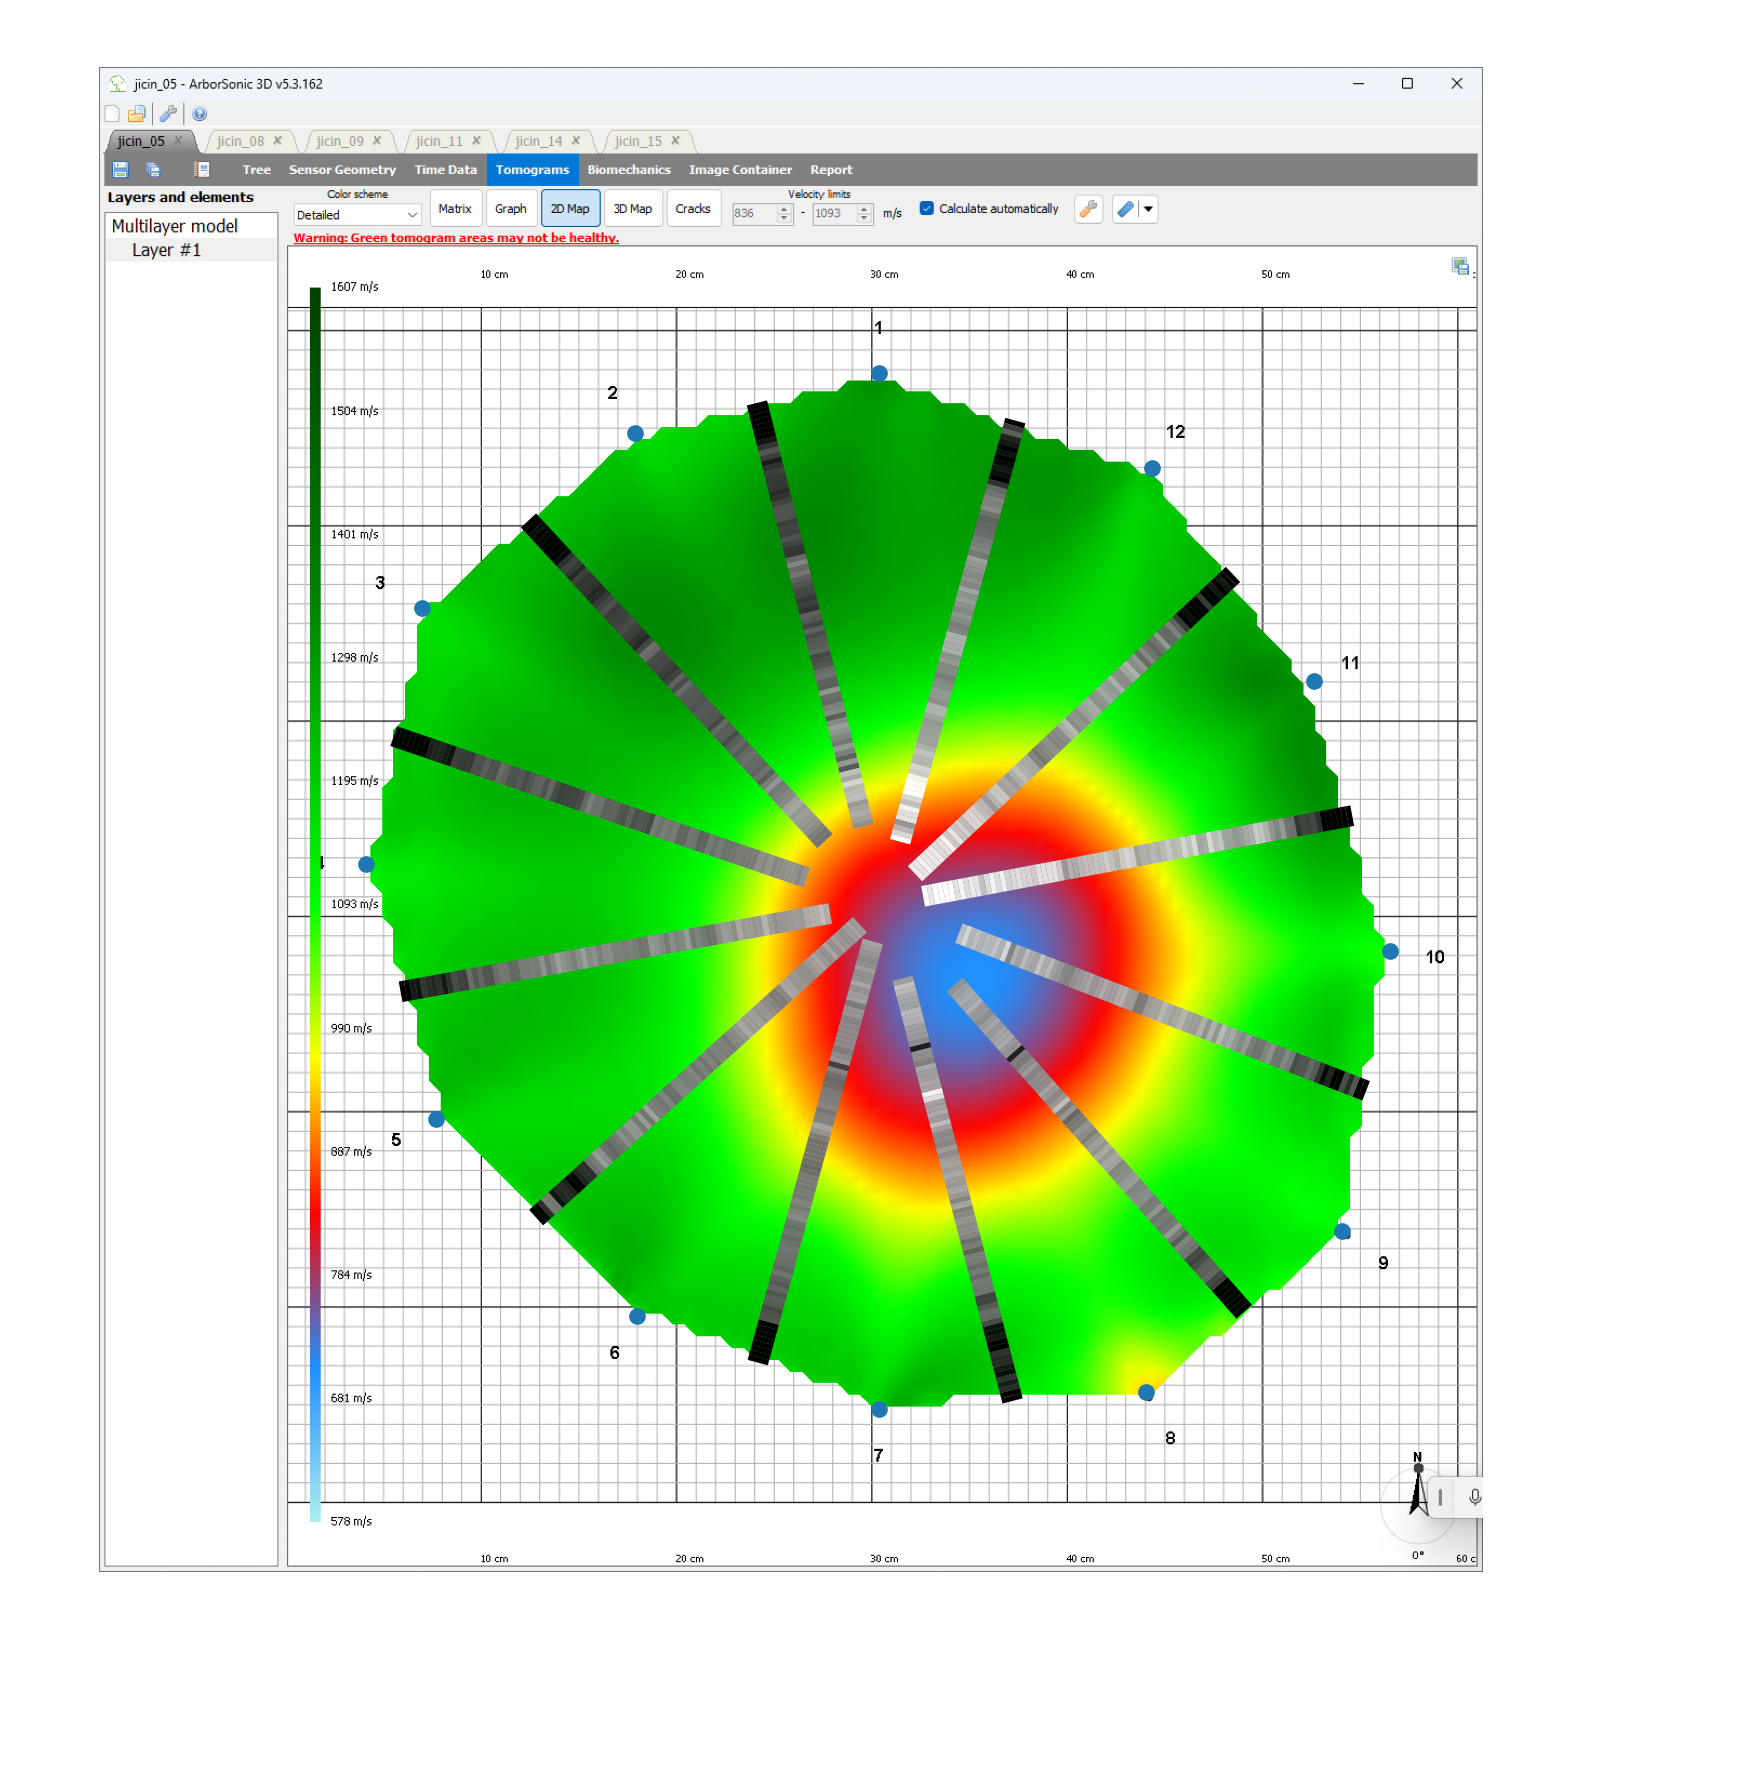

In [4]:
from transform_image import transform_image
import matplotlib.image as mpimg
import numpy as np

fig, [ax, cax] = plt.subplots(1, 2, figsize=(8, 6), gridspec_kw={'width_ratios': [40, 1]})
ax.plot(nodes_df['x'], nodes_df['y'], '.')
overlay_settings_plot = settings_plot.copy()
overlay_settings_plot['linewidth'] = 5
add_resistograph_data(resistograph_df, nodes_df, ax, cax, scale_length=0, **overlay_settings_plot)
cax.remove()

A_img = np.array([721, 282])
B_img = np.array([721, 1241])
A_target = nodes_df.values[0]
B_target = nodes_df.values[6]

overlay = mpimg.imread(f'data/05.png')

# Uložení rozsahu os
xlim = ax.get_xlim()
ylim = ax.get_ylim()

transform = transform_image(overlay, ax, A_img, B_img, A_target, B_target, plot_image=False)
ax.imshow(overlay, transform=transform + ax.transData, alpha=1, zorder=-500)


# Nastavení uložených rozsahů os
ax.set_xlim(np.array(xlim)*1.5)
ax.set_ylim(np.array(ylim)*1.5)
        

# Final adjustments
ax.set_aspect(1)
plt.tight_layout()
plt.show()